# Scraping the top repositories for Topics on GitHub


Steps:

- Scrape https://github.com/topics
- Get a list of topics. For each topic, get topic title, topic page URL and topic description
- For each topic, get the top 25-30 repositories in the topic from the topic page
- For each repository, grab the repo name, username, stars and repo URL
- For each topic create a CSV file in the following format:

```
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx
```


## Scrape the list of topics from Github

- use requests to downlaod the page
- user BS4 to parse and extract information
- convert to a Pandas dataframe

Function to download the page.

In [50]:
import requests
from bs4 import BeautifulSoup

def get_topics_page():
    # TODO - add comments
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [51]:
doc = get_topics_page()

# Create some helper functions to parse information from the page.

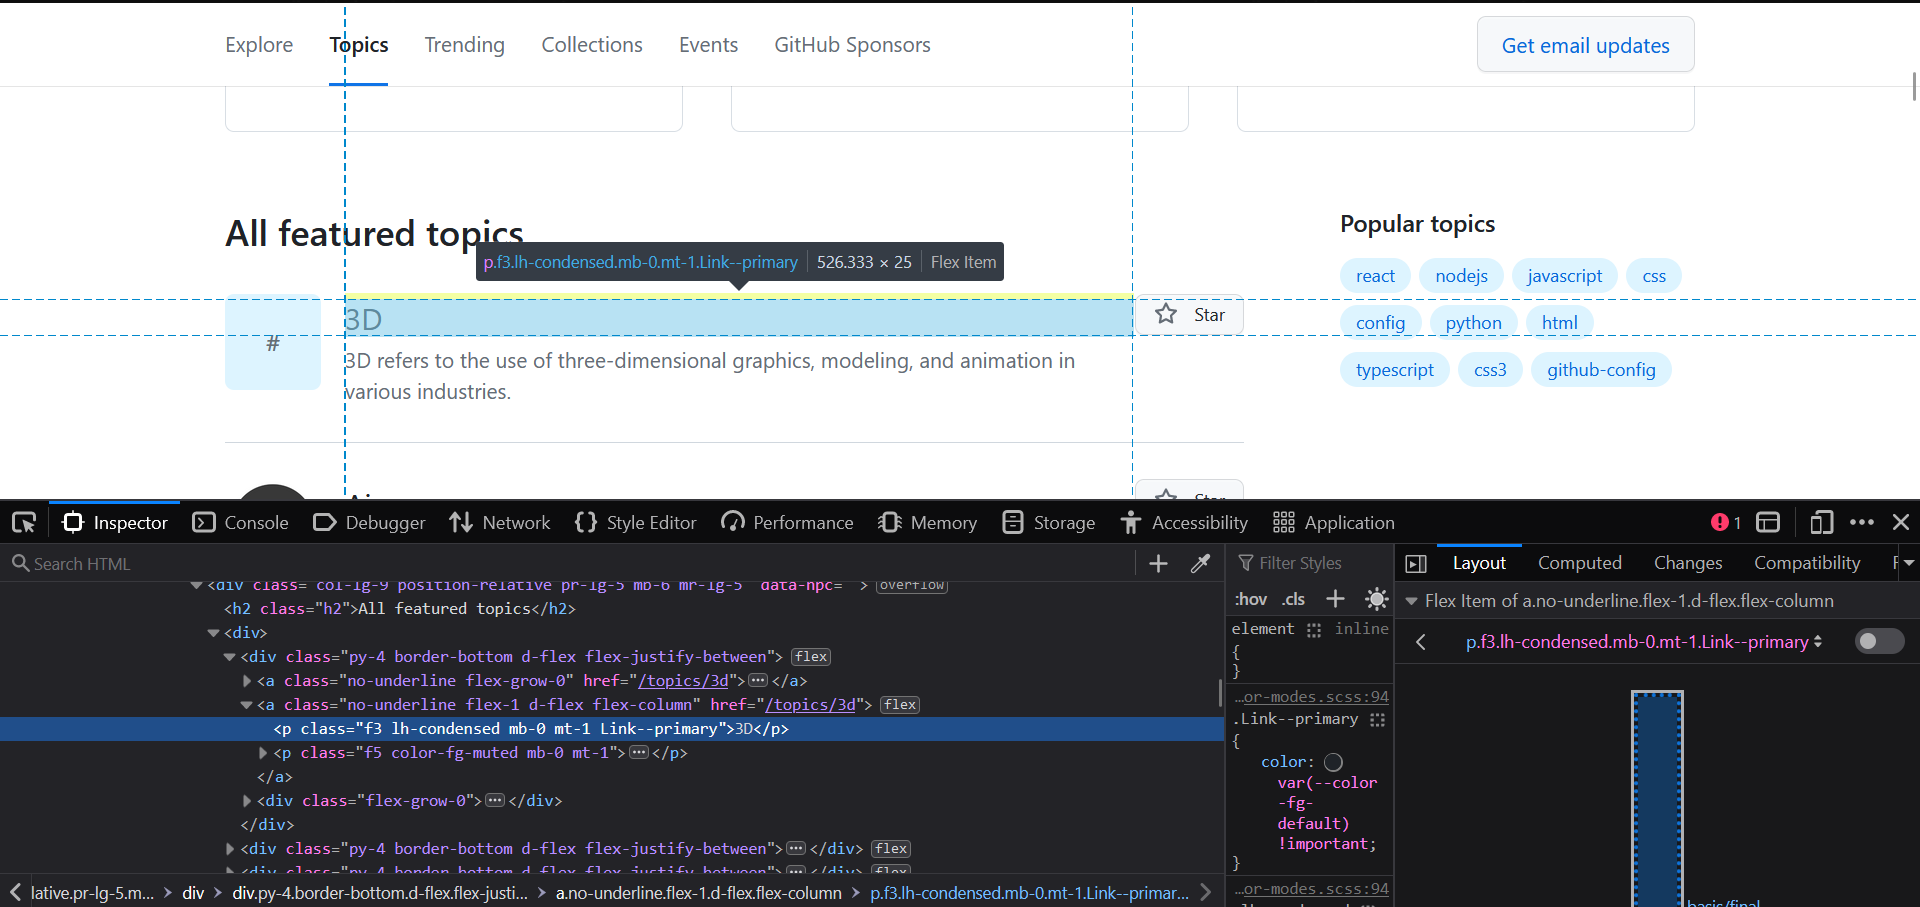

# To get topic titles, we can pick p tags with the class ...


In [52]:
def get_topic_title(doc):
    
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p',{'class':selection_class})
    
    topic_titles = []
    for tags in topic_title_tags:
        topic_titles.append(tags.text)
    return topic_titles

In [53]:
titles = get_topic_title(doc)

In [54]:
len(titles)

30

In [55]:
titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

In [56]:
def get_topic_desc(doc):
    
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})

    topic_descs = []
    for tags in topic_desc_tags:
        topic_descs.append(tags.text.strip())

    return topic_descs

In [57]:
def get_topic_urls(doc):

    topic_link_tags = doc.find_all('a',{'class':'no-underline flex-1 d-flex flex-column'})

    topic_URLS = []
    for tags in topic_link_tags:
        topic_URLS.append("https://github.com" + tags['href'])
    
    return topic_URLS

In [58]:
import pandas as pd
def scrape_topics():
    topics_url = "https://github.com/topics"
    
    response = requests.get(topics_url)
    #Check successful response
    
    if(response.status_code!=200):
        raise Exception('Failded to load page {}'.format(topic_URL))
    doc = BeautifulSoup(response.text)
    topics_dict = {
        'title':get_topic_title(doc),
        'description':get_topic_desc(doc),
        'URL':get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

In [59]:
scrape_topics()

,title,description,URL
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aryanwadhwa05/scraping-top-github-repos" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/aryanwadhwa05/scraping-top-github-repos


'https://jovian.com/aryanwadhwa05/scraping-top-github-repos'

## Get the top 25 repositories from a topic page

In [62]:
import os
def get_topic_page(topic_url):
    # Download the page
    response = requests.get(topic_url)
    
    #Check successful response
    if(response.status_code!=200):
        raise Exception('Failded to load page {}'.format(topic_URL))
    
    #parse using bs
    topic_doc = BeautifulSoup(response.text,'html.parser')
    return topic_doc

In [63]:
doc = get_topic_page('https://github.com/topics/3d')

In [64]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if(stars_str[-1] == 'k'):
        return int(float(stars_str[:-1])*1000)
    return(int(stars_str))

In [65]:
def get_repo_info(repo_tags, star_tags):
    # Returns all the important information about the repository
    a_tags = repo_tags.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()  
    base_url = "https://github.com"
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tags.text.strip())
    return username, repo_name, repo_url, stars
#     return username, repo_name, repo_url, stars

In [66]:
def get_topic_repos(topic_doc):

    
    #Get h1 tags containing repo title, repo URL and username
    h1_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3', {'class':h1_selection_class})
    
    span_selection_class = 'Counter js-social-count'
    star_tags = topic_doc.find_all('span', {'class':span_selection_class})
    
    topic_repos_dict = {
        'username': [],
        'repo_name': [],
        'stars': [],
        'repo_URL': []
    }
    
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_URL'].append(repo_info[3])
    return pd.DataFrame(topic_repos_dict)

In [67]:
def scrape_topic(topic_url,path):
    
#     fname = topic_name + '.csv'
    if os.path.exists(path):
        print("The {} file already exsists. SKipping ....".format(path))
    topic_df = get_topic_repos((get_topic_page(topic_url)))
    topic_df.to_csv(path, index = None)

In [68]:
import os
def scrape_topics_repos():
    print('Scraping...')
    topics_df = scrape_topics()
    #Creating Folders here
    
    os.makedirs('data',exist_ok = True)
    
    for index, row in topics_df.iterrows():
        print('Scraping top repos for the {}'.format(row['title']))
        scrape_topic(row['URL'],'data/{}.csv'.format(row['title']))

In [69]:
scrape_topics_repos()

Scraping...
Scraping top repos for the 3D
The data/3D.csv file already exsists. SKipping ....
Scraping top repos for the Ajax
The data/Ajax.csv file already exsists. SKipping ....
Scraping top repos for the Algorithm
The data/Algorithm.csv file already exsists. SKipping ....
Scraping top repos for the Amp
The data/Amp.csv file already exsists. SKipping ....
Scraping top repos for the Android
The data/Android.csv file already exsists. SKipping ....
Scraping top repos for the Angular
The data/Angular.csv file already exsists. SKipping ....
Scraping top repos for the Ansible
The data/Ansible.csv file already exsists. SKipping ....
Scraping top repos for the API
The data/API.csv file already exsists. SKipping ....
Scraping top repos for the Arduino
The data/Arduino.csv file already exsists. SKipping ....
Scraping top repos for the ASP.NET
The data/ASP.NET.csv file already exsists. SKipping ....
Scraping top repos for the Atom
The data/Atom.csv file already exsists. SKipping ....
Scraping t